# MATH 152 Lab 2 Overview



In [15]:
import sympy as sp
from sympy.plotting import plot

Given the region bounded by the curves $y = 1 - x^2$ and $y = x^6 - x + 1$:
1. Find the area of the region.
2. Find the volume of the solid formed by rotating the region about the $x$ axis.
3. Find the value $c$ such that the volume of the region rotated about the line $y = c$ is 5.

First, we visualize the region bounded by the two curves.
We do this by using sympy's plotting features.

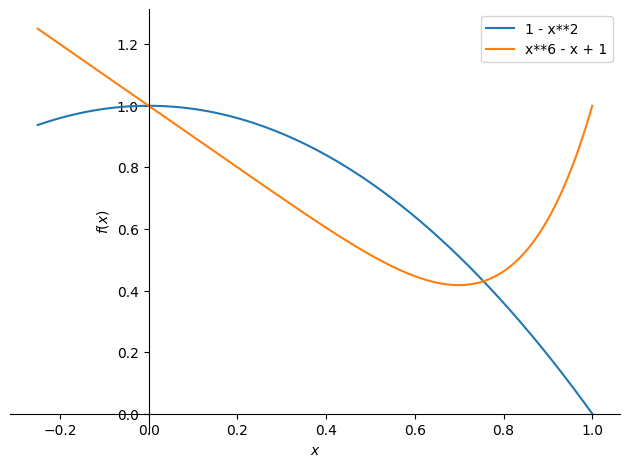

In [2]:
x = sp.symbols('x')
y0 = 1 - x**2
y1 = x**6 - x + 1
plot(y0, y1, (x, -0.25, 1), legend=True)

We see that the two curves intersect at what appears to be $x = 0$ and at some point between $x = 0.6$ and $x = 0.8$.
We also see that the curve $y_0 = 1-x^2$ is larger than the curve $y_1 = x^6 - x + 1$ in between the two intersection points.
Call the first intersection point $x_0$ and the second one $x_1$.
Then the area of the region bounded by the two curves is computed as

$$
A = \int_{x_0}^{x_1} y_0(x) - y_1(x)\,\mathrm dx.
$$

We will use sympy to solve for $x_0$ and $x_1$ numerically and also compute $A$ numerically.

In [3]:
x0 = sp.nsolve(y0 - y1, x, 0)
x1 = sp.nsolve(y0 - y1, x, 0.7)
A = sp.integrate(y0 - y1, (x, x0, x1))

print('The two intersection points are x = {} and x = {}'.format(x0, x1))
print('The area of the region is {}'.format(A))

The two intersection points are x = 0 and x = 0.754877666246693
The area of the region is 0.121579206975124


Now we find the volume obtained by rotating the region about the $x$ axis.
This is computed as

$$
V = \pi\int_{x_0}^{x_1}y_1(x)^2 - y_2(x)^2\,\mathrm dx.
$$

Once again, we use sympy to perform this computation.

In [4]:
V = sp.pi * sp.integrate(y0**2 - y1**2, (x, x0, x1))
print('The volume of the region rotated about the x axis is {}'.format(V.evalf()))

The volume of the region rotated about the x axis is 0.544025155285806


Now suppose that we want to rotate the region about the line $y = c$ instead of $y = 0$.
Then the formula for the volume as a function of $c$ is

$$
V(c) = \pi\int_{x_0}^{x_1}(y_1(x)-c)^2 - (y_2(x)-c)^2\,\mathrm dx.
$$

Using sympy, we will find the value of $c$ such that $V(c) = 5$.
Let $c_0$ denote the solution we are looking for.
We first visualize $V(c)$ to determine an estimate of $c_0$.

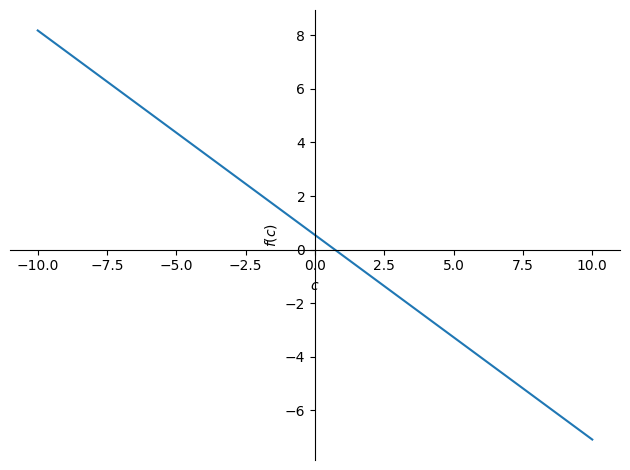

In [5]:
c = sp.symbols('c')
V = sp.pi * sp.integrate((y0 - c)**2 - (y1 - c)**2, (x, x0, x1))
plot(V)

We see that the value $c_0$ such that $V(c_0) = 5$ lies somewhere between $c = -7.5$ and $c = -5$.
We use sympy to numerically compute $c_0$ with an initial guess of $-6$.

In [6]:
c0 = sp.nsolve(V - 5, c, -6)
print('The value of c such that V(c) = 5 is {}'.format(c0))

The value of c such that V(c) = 5 is -5.83315552448461


All the answers that we computed were numerical approximations.
What if, for some reason, we want exact expressions for the answers?
Here is how we obtain them.

In [44]:
x0, x1 = sp.solveset(y0 - y1, x, domain=sp.S.Reals)
area = sp.integrate(y0 - y1, (x, x0, x1))
volume = sp.pi * sp.integrate((y0**2 - y1)**2, (x, x0, x1))
V = sp.pi * sp.integrate((y0 - c)**2 - (y1 - c)**2, (x, x0, x1))
c0 = sp.solve(V - 5, c)[0]
print('The two intersection points are x = {} and x = {}'.format(x0, x1))
print('The area of the region is {}'.format(area))
print('The volume of the region rotated about the x axis is {}'.format(volume))
print('The value of c such that V(c) = 5 is {}'.format(c0))

The two intersection points are x = 0 and x = -1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3)
The area of the region is -(-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**3/3 - (-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**7/7 + (-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**2/2
The volume of the region rotated about the x axis is pi*(-(-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**4 - 4*(-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**7/7 - (-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**8/4 - 2*(-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**11/11 + (-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**13/13 + 5*(-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(69)/18 + 25/54)**(1/3))**9/9 + (-1/3 + 1/(9*(sqrt(69)/18 + 25/54)**(1/3)) + (sqrt(6

Since the exact solutions are hard to read, we prefer to solve things numerically.